In [118]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [119]:
np.random.seed(1538)

In [120]:
dist_1 = np.random.randn(100,2)

In [121]:
dist_2 = (np.random.randn(100,2) * 2) + np.array([3,2])

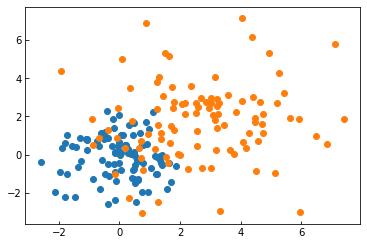

In [122]:
pl.scatter(dist_1[:,0], dist_1[:,1])
pl.scatter(dist_2[:,0], dist_2[:,1])

In [123]:
center_1 = np.random.rand(2)

In [124]:
center_2 = np.random.rand(2) * np.array([.1,10])

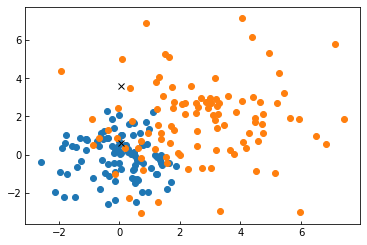

In [125]:
pl.plot(center_1[0], center_1[1], 'kx')
pl.plot(center_2[0], center_2[1], 'kx')
pl.scatter(dist_1[:,0], dist_1[:,1])
pl.scatter(dist_2[:,0], dist_2[:,1])

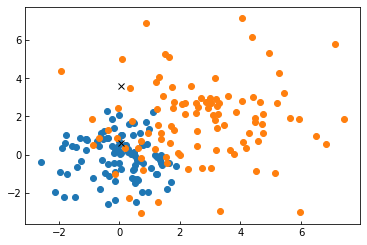

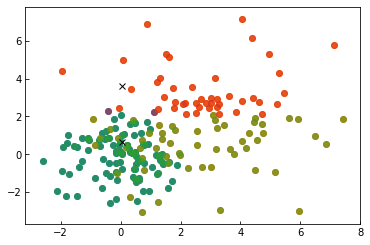

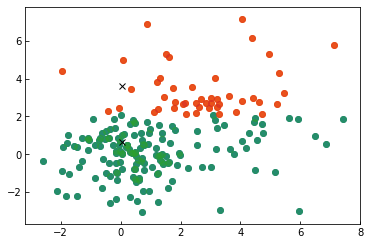

In [126]:
def distance(data, center):
    dist = np.abs(data - center)
    return dist[:,0] + dist[:,1]


def get_assignment(d1_c1, d2_c1, d1_c2, d2_c2):
    bool_1 = d1_c1 < d1_c2    
    bool_2 = d2_c1 < d2_c2    
    new_Dist1 = np.concatenate((dist_1[bool_1], dist_2[bool_2]))
    new_Dist2 = np.concatenate((dist_1[~bool_1], dist_2[~bool_2]))
    
    return new_Dist1, new_Dist2

def calc_dist (dist_1, center_1, dist_2, center_2):
    d1_c1 = distance (dist_1, center_1)
    d1_c2 = distance (dist_1, center_2)
    d2_c1 = distance (dist_2, center_1)
    d2_c2 = distance (dist_2, center_2)
    return d1_c1, d1_c2, d2_c1, d2_c2

def plotit(dist_1, center_1, dist_2, center_2, new_Dist1, new_Dist2):
    pl.plot(center_1[0], center_1[1], 'kx')
    pl.plot(center_2[0], center_2[1], 'kx')
    pl.scatter(dist_1[:,0], dist_1[:,1])
    pl.scatter(dist_2[:,0], dist_2[:,1])
    pl.scatter(new_Dist1[:,0], new_Dist1[:,1], alpha = 0.5)
    pl.scatter(new_Dist2[:,0], new_Dist2[:,1], alpha = 0.5)

    
new_Dist1 = np.empty_like(dist_1)
d1_c1 = np.empty_like(dist_1) + 100
iteration = 0  
pl.figure()
pl.plot(center_1[0], center_1[1], 'kx')
pl.plot(center_2[0], center_2[1], 'kx')
pl.scatter(dist_1[:,0], dist_1[:,1])
pl.scatter(dist_2[:,0], dist_2[:,1])
    
#while not ((d1_c1).sum() == 0 or (d1_c1).sum() == len(d1_c1)) and iteration<10:
while not (new_Dist1.shape == dist_1.shape and (new_Dist1 == dist_1).all()) \
    and iteration<10:
    pl.figure()
    if iteration>0:
        dist_1 = new_Dist1
        dist_2 = new_Dist2
    #print ("here", (d1_c1).sum(),  (d1_c1),  len(d1_c1))
#print (dist_1, new_Dist1)
    d1_c1, d1_c2, d2_c1, d2_c2 = calc_dist(dist_1, center_1, dist_2, center_2)
    new_Dist1, new_Dist2 = get_assignment(d1_c1, d2_c1, d1_c2, d2_c2)
    plotit(dist_1, center_1, dist_2, center_2, new_Dist1, new_Dist2)
    iteration = iteration + 1
